## Loan Predict using Decision tree

In [107]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_ammount.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
# Loan_Id column does not affeted target column , so drop it
df=df.drop("Loan_ID",axis=1)


In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
df["Credit_History"].fillna("NAN", inplace=True)

In [10]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
NAN     50
Name: Credit_History, dtype: int64

In [11]:
df["Credit_History"].replace("NAN",np.nan,inplace=True)

In [12]:
#Replace NAN values with mode 
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [13]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [14]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
#replace with Mode of Self_Employed
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)

In [16]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [17]:
# Loan Amount values fill using Mean values
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [18]:
#Dependents values fill using mode
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

In [19]:
# Loan_Amount_Term  values fill using Mode
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

In [20]:
# Gender null values  fill using Mode
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [21]:
# Married null values fill using mode
df["Married"].fillna(df["Married"].mode()[0],inplace=True)

In [22]:
# All the null values filled up
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df1=df

### Data Encoding

In [24]:
df1.select_dtypes(include=['object','category']).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
df1["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [33]:
df1['Gender'] = df1['Gender'].map({'Male': 0, 'Female': 1})
df1['Married'] = df1['Married'].map({'Yes': 0, 'No': 1})
df1["Dependents"]=df1['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df1['Education']=df1['Education'].map({'Graduate':0,'Not Graduate':1})
df1['Self_Employed']=df1['Self_Employed'].map({'No':0,'Yes':1})
df1['Property_Area']=df1['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})
df1['Loan_Status']=df1['Loan_Status'].map({'Y':0,'N':1})

In [34]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0
1,0,0,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,1
2,0,0,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0
3,0,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0
4,0,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0


### Model Training

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [46]:
#split tarin test split
X=df1.drop('Loan_Status',axis=1)
y=df1['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
X_train.shape

(429, 11)

In [117]:
X_test.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
380,0,0,0,0,0,3333,2500.0,128.0,360.0,1.0,0
446,0,0,2,1,0,4652,0.0,110.0,360.0,1.0,2
144,0,0,2,0,0,11757,0.0,187.0,180.0,1.0,1
290,0,0,0,0,0,3075,2416.0,139.0,360.0,1.0,2
353,1,0,0,0,1,5500,0.0,105.0,360.0,0.0,2


In [97]:
#DT=DecisionTreeClassifier(criterion='gini',random_state=0)
#DT=DecisionTreeClassifier(criterion= 'gini',max_depth= 4,max_features= 1.0,min_samples_split= 0.5)
DT=DecisionTreeClassifier()

In [98]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
y_pread=DT.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pread)
print(cm)

[[97 23]
 [34 31]]


In [101]:
Accuracy=accuracy_score(y_test,y_pread)
Accuracy

0.6918918918918919

## Hyperparameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid={
    "max_depth":[2,4,8,10,None],
    'criterion':['gini','entropy'],
    'max_features':[0.25,0.5,1.0,0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [89]:
GS=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)

In [108]:
GS.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0, 0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [91]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_split': 0.5}

### Using best_params improve accuracy 

In [102]:
New_DT=DecisionTreeClassifier(criterion= 'gini',max_depth= 4,max_features= 1.0,min_samples_split= 0.5)

In [104]:
New_DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=1.0, min_samples_split=0.5)

In [105]:
y_pread=New_DT.predict(X_test)

In [106]:
New_cm=confusion_matrix(y_test,y_pread)
print(New_cm)
New_Accuracy=accuracy_score(y_test,y_pread)
print("New Accuracy:",New_Accuracy)

[[118   2]
 [ 37  28]]
New Accuracy: 0.7891891891891892


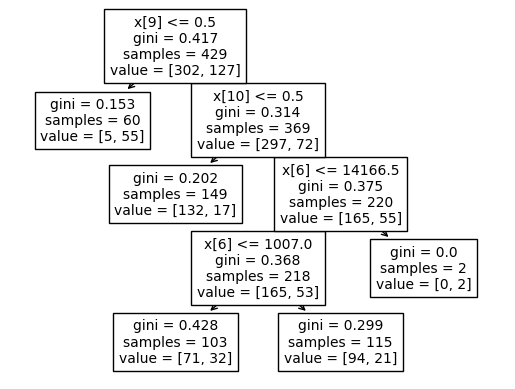

In [109]:
from sklearn import tree

tree.plot_tree(New_DT);

### Check Manually

In [110]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [121]:
new_loan_data = pd.DataFrame({
    'Gender': [1],
    'Married': [0],
    'Dependents': [0],
    'Education': [0],
    'Self_Employed': [1],
    'ApplicantIncome': [5500],
    'CoapplicantIncome': [0],
    'LoanAmount': [105],
    'Loan_Amount_Term': [360],
    'Credit_History': [0],
    'Property_Area': [2],
    'Loan_Status': [0]  
})


X_new = new_loan_data.drop(columns='Loan_Status')
y_new_placeholder = new_loan_data['Loan_Status']

y_pred_new = New_DT.predict(X_new)

# Update the predicted loan status in the DataFrame
new_loan_data['Loan_Status'] = y_pred_new

# Display the updated DataFrame with predicted loan status
#print(new_loan_data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
#                     'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#                     'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']])
print("Loan status is :",new_loan_data['Loan_Status'][0] )

Loan status is : 1


### Features Important

In [122]:
for importance, name in sorted(zip(New_DT.feature_importances_, X_train.columns),reverse=True):
    print (name, importance)

Credit_History 0.8799010972156232
CoapplicantIncome 0.06636515460690534
Property_Area 0.05373374817747149
Self_Employed 0.0
Married 0.0
Loan_Amount_Term 0.0
LoanAmount 0.0
Gender 0.0
Education 0.0
Dependents 0.0
ApplicantIncome 0.0
